In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../oklahoma_earthquakes_largefiles/arb_2014_cleaned.csv", low_memory=False)
df.head()

,API,Well_Name,Well_Number,Operator_Number,Operator_Name,Daily_Report_Date_Start,Daily_Report_Date_End,Report_Date,Volume_BPD,Pressure_PSI,Latitude,Longitude,DirArea,Directive_Status
0,3.500322e+09,ROSE KELLY SWD,1-3,20357.0,SANDRIDGE EXPLORATION & PRODUCTION LLC,2014-11-23,2020-03-29,2014-12-31,3246.0,0.0,36.928442,-98.256115,OWRA,NOT IN GRANITE
1,3.500322e+09,ROSE KELLY SWD,1-3,20357.0,SANDRIDGE EXPLORATION & PRODUCTION LLC,2014-11-23,2020-03-29,2014-12-30,3373.0,0.0,36.928442,-98.256115,OWRA,NOT IN GRANITE
2,3.500322e+09,ROSE KELLY SWD,1-3,20357.0,SANDRIDGE EXPLORATION & PRODUCTION LLC,2014-11-23,2020-03-29,2014-12-29,3508.0,0.0,36.928442,-98.256115,OWRA,NOT IN GRANITE
3,3.500322e+09,ROSE KELLY SWD,1-3,20357.0,SANDRIDGE EXPLORATION & PRODUCTION LLC,2014-11-23,2020-03-29,2014-12-28,3363.0,0.0,36.928442,-98.256115,OWRA,NOT IN GRANITE
4,3.500322e+09,ROSE KELLY SWD,1-3,20357.0,SANDRIDGE EXPLORATION & PRODUCTION LLC,2014-11-23,2020-03-29,2014-12-27,3226.0,0.0,36.928442,-98.256115,OWRA,NOT IN GRANITE


In [6]:
sum_2014 = df.groupby("Report_Date")["Volume_BPD"].sum()

In [7]:
sum_2014

Report_Date
2012-09-21       150.000000
2012-09-22       170.000000
2012-09-23       160.000000
2012-09-24       131.000000
2012-09-25      2955.000000
                  ...      
2014-12-27    647831.146973
2014-12-28    641367.000000
2014-12-29    657652.126953
2014-12-30    677097.060059
2014-12-31    641516.602051
Name: Volume_BPD, Length: 832, dtype: float64

<AxesSubplot:>

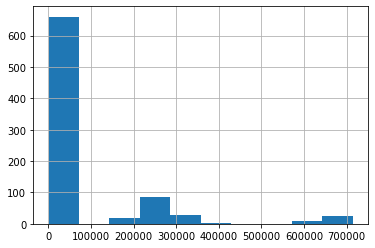

In [8]:
sum_2014.hist()

In [14]:
df.iloc[:, 5:8] = df.iloc[:, 5:8].apply(pd.to_datetime)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   API                      15411 non-null  float64       
 1   Well_Name                15411 non-null  object        
 2   Well_Number              15411 non-null  object        
 3   Operator_Number          15411 non-null  float64       
 4   Operator_Name            15411 non-null  object        
 5   Daily_Report_Date_Start  15411 non-null  datetime64[ns]
 6   Daily_Report_Date_End    15411 non-null  datetime64[ns]
 7   Report_Date              15411 non-null  datetime64[ns]
 8   Volume_BPD               15411 non-null  float64       
 9   Pressure_PSI             15411 non-null  float64       
 10  Latitude                 15411 non-null  float64       
 11  Longitude                15411 non-null  float64       
 12  DirArea                  14952 n

In [20]:
sum_weekly_2014 = df.groupby(pd.Grouper(key="Report_Date",freq='W'))["Volume_BPD"].sum()
sum_weekly_2014

Report_Date
2012-09-23    4.800000e+02
2012-09-30    1.606900e+04
2012-10-07    2.007400e+04
2012-10-14    1.811200e+04
2012-10-21    1.929000e+04
                  ...     
2014-12-07    4.586831e+06
2014-12-14    4.598096e+06
2014-12-21    4.652543e+06
2014-12-28    4.635287e+06
2015-01-04    1.976266e+06
Freq: W-SUN, Name: Volume_BPD, Length: 120, dtype: float64

<AxesSubplot:>

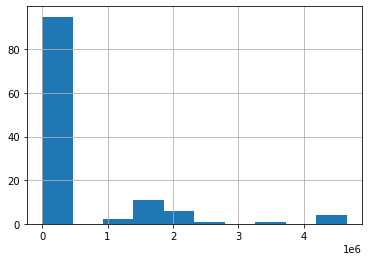

In [21]:
sum_weekly_2014.hist()

In [22]:
mean_weekly_2014 = df.groupby(pd.Grouper(key="Report_Date",freq='W'))["Volume_BPD"].mean()
mean_weekly_2014

Report_Date
2012-09-23     160.000000
2012-09-30    2295.571429
2012-10-07    2867.714286
2012-10-14    2587.428571
2012-10-21    2755.714286
                 ...     
2014-12-07    5441.080284
2014-12-14    5422.283344
2014-12-21    5578.589266
2014-12-28    5485.546815
2015-01-04    5429.301618
Freq: W-SUN, Name: Volume_BPD, Length: 120, dtype: float64

<AxesSubplot:>

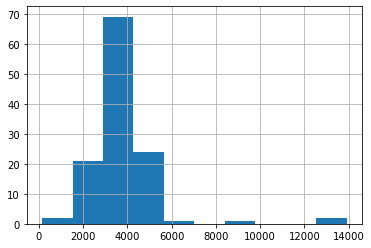

In [23]:
mean_weekly_2014.hist()

In [25]:
df.groupby(pd.Grouper(key="Report_Date",freq='W'))["Volume_BPD"].describe()

,count,mean,std,min,25%,50%,75%,max
Report_Date,,,,,,,,
2012-09-23,3.0,160.000000,10.000000,150.0,155.0,160.000000,165.0,170.0
2012-09-30,7.0,2295.571429,1281.973200,131.0,1651.0,2809.000000,2944.5,3938.0
2012-10-07,7.0,2867.714286,630.165776,1993.0,2441.0,2959.000000,3190.0,3860.0
2012-10-14,7.0,2587.428571,180.383718,2313.0,2452.5,2675.000000,2720.5,2778.0
2012-10-21,7.0,2755.714286,251.048278,2401.0,2607.0,2813.000000,2898.5,3065.0
...,...,...,...,...,...,...,...,...
2014-12-07,843.0,5441.080284,9313.964074,-999.0,280.5,2139.745117,6717.5,65052.0
2014-12-14,848.0,5422.283344,9542.996969,-999.0,265.5,1829.158996,6100.0,67228.0
2014-12-21,834.0,5578.589266,9634.372821,-999.0,242.0,1828.000000,6106.5,65844.0


In [26]:
df["Volume_BPD"].describe()

count    15411.000000
mean      4594.920550
std       9605.496977
min       -999.000000
25%        148.000000
50%       1276.000000
75%       4617.500000
max      67849.000000
Name: Volume_BPD, dtype: float64